In [155]:
import numpy as np
from sklearn import model_selection
from sklearn.datasets import load_iris
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

In [156]:
X, y = load_iris(return_X_y=True)

# Для наглядности возьмем только первые два признака (всего в датасете их 4)
X = X[:, :2]

In [157]:
X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y, test_size=0.2, random_state=1)

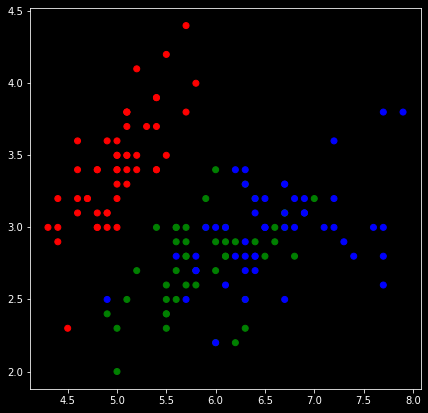

In [158]:
cmap = ListedColormap(['red', 'green', 'blue'])
plt.figure(figsize=(7, 7))
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=cmap);

In [159]:
# Используем евклидову метрику. Реализуем функцию для ее подсчета.

def e_metrics(x1, x2):
    distance = 0
    for i in range(len(x1)):
        distance += np.square(x1[i] - x2[i])
    return np.sqrt(distance)

In [160]:
# Реализуем алгоритм поиска k ближайших соседей.

def knn(x_train, y_train, x_test, k):
    
    answers = []
    for x in x_test:
        test_distances = []
            
        for i in range(len(x_train)):
            
            # расчет расстояния от классифицируемого объекта до
            # объекта обучающей выборки
            distance = e_metrics(x, x_train[i])
            
            # Записываем в список значение расстояния и ответа на объекте обучающей выборки
            test_distances.append((distance, y_train[i]))
        
        # отберем k ближайших соседей
        k_neighbours = sorted(test_distances)[0:k]
                
        # создаем словарь со всеми возможными классами
        classes = {class_item: 0 for class_item in set(y_train)}
        
        # Сортируем список и среди первых k элементов подсчитаем частоту появления разных классов
        for d in k_neighbours:
            classes[d[1]] += 1 # вес каждого соседа равен 1 (изменить в дз в этом месте)
            
        # Записываем в список ответов наиболее часто встречающийся класс
        answers.append(sorted(classes, key=classes.get)[-1])
    return answers

In [161]:
# Напишем функцию для вычисления точности

def accuracy(pred, y):
    return (sum(pred == y) / len(y))

In [162]:
# Проверим работу алгоритма при различных k

k = 1

y_pred = knn(X_train, y_train, X_test, k)

print(f'Точность алгоритма при k = {k}: {accuracy(y_pred, y_test):.3f}')

Точность алгоритма при k = 1: 0.667


In [163]:
# Построим график распределения классов.

def get_graph(X_train, y_train, k):
    cmap_light = ListedColormap(['#FFAAAA', '#AAFFAA','#00AAFF'])

    h = .02

    # Расчет пределов графика
    x_min, x_max = X_train[:, 0].min() - 1, X_train[:, 0].max() + 1
    y_min, y_max = X_train[:, 1].min() - 1, X_train[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

    # Получим предсказания для всех точек
    Z = knn(X_train, y_train, np.c_[xx.ravel(), yy.ravel()], k)

    # Построим график
    Z = np.array(Z).reshape(xx.shape)
    plt.figure(figsize=(7,7))
    plt.pcolormesh(xx, yy, Z, cmap=cmap_light)

    # Добавим на график обучающую выборку
    plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap=cmap)
    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())
    plt.title(f"Трехклассовая kNN классификация при k = {k}")
    plt.show()

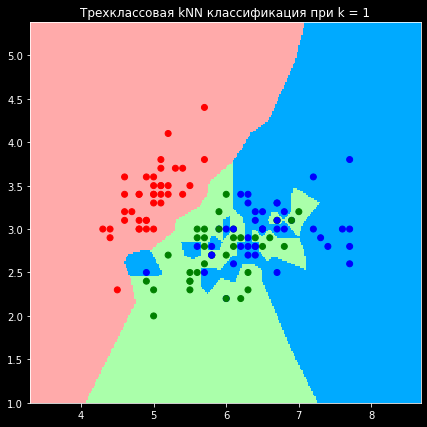

In [164]:
get_graph(X_train, y_train, k)

In [165]:
k = 3

y_pred = knn(X_train, y_train, X_test, k)

print(f'Точность алгоритма при k = {k}: {accuracy(y_pred, y_test):.3f}')

Точность алгоритма при k = 3: 0.733


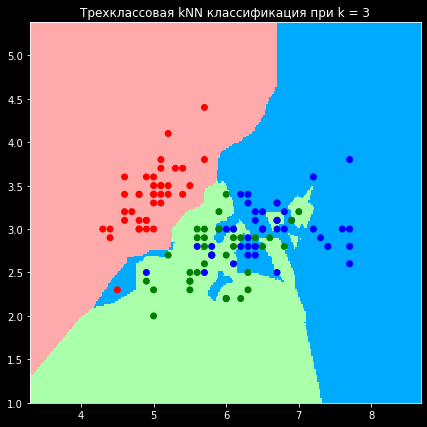

In [166]:
get_graph(X_train, y_train, k)

In [167]:
k = 5

y_pred = knn(X_train, y_train, X_test, k)

print(f'Точность алгоритма при k = {k}: {accuracy(y_pred, y_test):.3f}')

Точность алгоритма при k = 5: 0.867


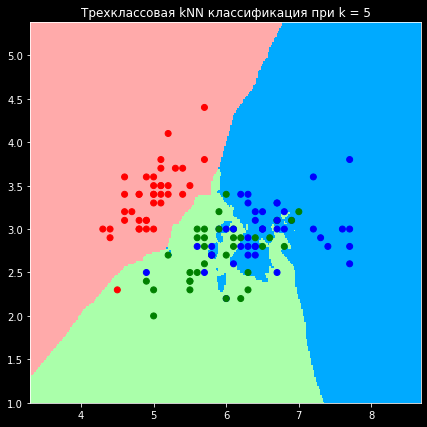

In [168]:
get_graph(X_train, y_train, k)

In [169]:
k = 10

y_pred = knn(X_train, y_train, X_test, k)

print(f'Точность алгоритма при k = {k}: {accuracy(y_pred, y_test):.3f}')

Точность алгоритма при k = 10: 0.833


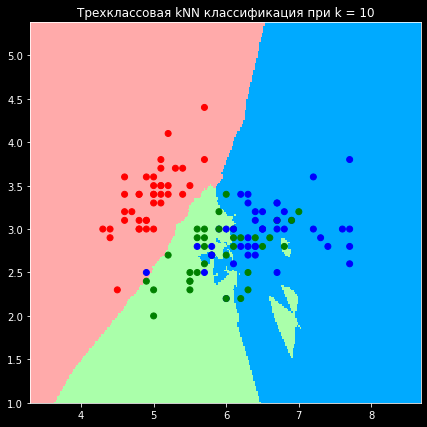

In [170]:
get_graph(X_train, y_train, k)

**1. К алгоритму kNN, представленному на уроке, реализуйте добавление весов для соседей по любому из показанных на уроке принципов. Сравните точность нового алгоритма с исходным при разных значениях `k`.**

In [171]:
# Реализуем алгоритм поиска k ближайших соседей.

def knn_w(x_train, y_train, x_test, k, weight_q=1, variant=None):
    
    answers = []
    for x in x_test:
        test_distances = []
            
        for i in range(len(x_train)):
            
            # расчет расстояния от классифицируемого объекта до
            # объекта обучающей выборки
            distance = e_metrics(x, x_train[i])
            
            # Записываем в список значение расстояния и ответа на объекте обучающей выборки
            test_distances.append((distance, y_train[i]))
        
        # отберем k ближайших соседей
        k_neighbours = sorted(test_distances)[0:k] 
                
        # создаем словарь со всеми возможными классами
        classes = {class_item: 0 for class_item in set(y_train)}

        # Сортируем список и среди первых k элементов подсчитаем частоту появления разных классов
        for num, d in enumerate(k_neighbours):                        
            if variant == 1:
                # classes[d[1]] += 1  # вес каждого соседа равен 1 
                # classes[d[1]] += weight_q**num  # вес зависит от номера соседа
                classes[d[1]] += 1/(num+1e-8)  # вес зависит от номера соседа
            elif variant == 2:
                classes[d[1]] += weight_q**d[0]  # вес зависит от расстояния

        # Записываем в список ответов наиболее часто встречающийся класс
        answers.append(sorted(classes, key=classes.get)[-1])
        
    return answers

In [172]:
accuracy_knn = {}
accuracy_knn_w_1 = {}
accuracy_knn_w_2 = {}

k_list = [1, 3, 5, 10, 15]

for i in range(len(k_list)):
    y_pred = knn(X_train, y_train, X_test, k_list[i])
    accuracy_knn[k_list[i]] = round(accuracy(y_pred, y_test), 3)

    y_pred = knn_w(X_train, y_train, X_test, k_list[i], weight_q=0.5, variant=1)
    accuracy_knn_w_1[k_list[i]] = round(accuracy(y_pred, y_test), 3)

    y_pred = knn_w(X_train, y_train, X_test, k_list[i], weight_q=0.5, variant=2)
    accuracy_knn_w_2[k_list[i]] = round(accuracy(y_pred, y_test), 3)

print(f'{accuracy_knn} - KNN без весов')
print(f'{accuracy_knn_w_1} - KNN с весами от номера соседа')
print(f'{accuracy_knn_w_2} - KNN с весами от расстояния')

{1: 0.667, 3: 0.733, 5: 0.867, 10: 0.833, 15: 0.833} - KNN без весов
{1: 0.667, 3: 0.667, 5: 0.667, 10: 0.667, 15: 0.667} - KNN с весами от номера соседа
{1: 0.667, 3: 0.733, 5: 0.867, 10: 0.867, 15: 0.833} - KNN с весами от расстояния


**Вывод:**  Алгоритм KNN с весами равными 1 в данном случае разделяет классы довольно хорошо. Использование весов, зависящих от номера соседа, показало результат точности хуже (**0.667** для всех вариантов k). Использование весов, зависящих от расстояния, показало результат практически такой как и при весах, равным 1 (исключение **k=10**, точность стала выше: **0.867** против **0.833**)

**2. (\*) Напишите функцию подсчета метрики качества кластеризации как среднее квадратичное внутрикластерное расстояние и постройте график ее зависимости от количества кластеров `k` (взять от 1 до 10) для выборки данных из данного урока (создать датасет, как в методичке).**

In [173]:
from sklearn.datasets import make_blobs
import random

# Сгенерируем три облака точек
X, y = make_blobs(n_samples=100, random_state=1)

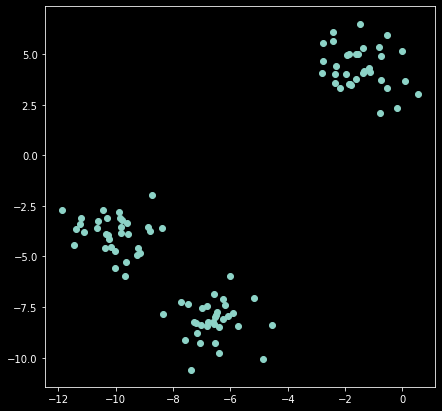

In [174]:
plt.figure(figsize=(7,7))
plt.scatter(X[:, 0], X[:, 1]);

In [175]:
# В качестве метрики расстояния будем использовать евклидово расстояние. 
# В качестве центроидов выберем первые k элементов датасета. Реализуем основной цикл алгоритма.


def kmeans(data, k, max_iterations, min_distance):
    # Создадим словарь для классификации
    classes = {i: [] for i in range(k)}
    
    # инициализируем центроиды как первые k элементов датасета
    centroids = [data[i] for i in range(k)]
    
    for _ in range(max_iterations):
        # классифицируем объекты по центроидам
        for x in data:
            # определим расстояния от объекта до каждого центроида
            distances = [e_metrics(x, centroid) for centroid in centroids]
            # отнесем объект к кластеру, до центроида которого наименьшее расстояние
            classification = distances.index(min(distances))
            classes[classification].append(x)
        
        # сохраним предыдущие центроиды в отдельный список для последующего сравнения сновыми
        old_centroids = centroids.copy()
        
        # пересчитаем центроиды как среднее по кластерам
        for classification in classes:
            centroids[classification] = np.average(classes[classification], axis=0)
            
        # сравним величину смещения центроидов с минимальной
        optimal = True
        for centroid in range(len(centroids)):
            if np.sum(abs((centroids[centroid] - old_centroids[centroid]) / old_centroids * 100)) > min_distance:
                optimal = False
                
        # если все смещения меньше минимального, останавливаем алгоритм  
        if optimal:
            break
    
    return old_centroids, classes

In [176]:
# Функция для визуализации кластеров

def visualize(centroids, classes):
    colors = ['r', 'g', 'b']
    
    plt.figure(figsize=(7,7))
    
    # нанесем на график центроиды
    for centroid in centroids:
        plt.scatter(centroid[0], centroid[1], marker='x', s=130, c='black')
        
    # нанесем объекты раскрашенные по классам
    for class_item in classes:
        for x in classes[class_item]:
            plt.scatter(x[0], x[1], color=colors[class_item])
            
    plt.show()

In [177]:
# определим максимальное количество итераций
max_iterations = 1

# и минимальное расстояние между центроидами до пересчета и после него, при котором нужно остановить алгоритм
min_distance = 1e-4

# сразу определим известное нам количество кластеров
k = 3

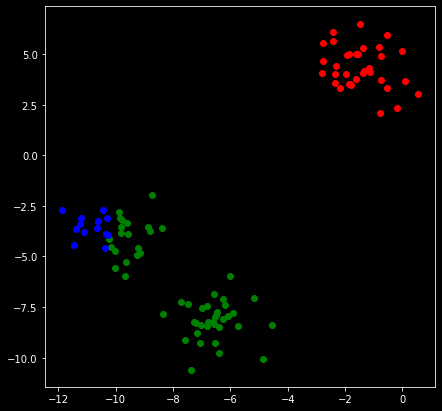

In [178]:
# Проверим результат алгоритма после одной итерации

centroids, clusters = kmeans(X, k, max_iterations, min_distance)

visualize(centroids, clusters)

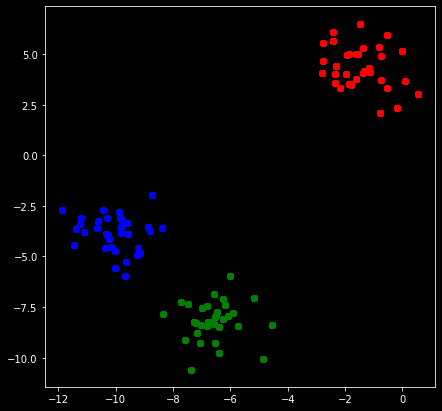

In [179]:
max_iterations = 10

centroids, clusters = kmeans(X, k, max_iterations, min_distance)

visualize(centroids, clusters)

In [180]:
# Функция подсчета метрики качества кластеризации как среднее квадратичное внутрикластерное расстояние

def cluster_cohesion(centroids, clusters):
    sum_k = 0
    for i in range(len(centroids)):
        sum_dist = 0
        for j in range(len(clusters[i])):
           sum_dist += e_metrics(clusters[i][j], centroids[i])**2
        sum_k += sum_dist / len(clusters[i])
    return round(sum_k, 3)

In [181]:
max_iterations = 10
min_distance = 1e-4

k_list_kmeans = [i for i in range(1, 11)]

cluster_cohesion_list = []

for i in range(len(k_list_kmeans)):
    centroids, clusters = kmeans(X, k_list_kmeans[i], max_iterations, min_distance)
    cluster_cohesion_list.append((k_list_kmeans[i], cluster_cohesion(centroids, clusters)))

print(f'Метрика качества кластеризации:\n{cluster_cohesion_list}')

Метрика качества кластеризации:
[(1, 41.182), (2, 10.882), (3, 6.055), (4, 5.407), (5, 5.136), (6, 5.787), (7, 5.647), (8, 5.859), (9, 6.188), (10, 6.356)]


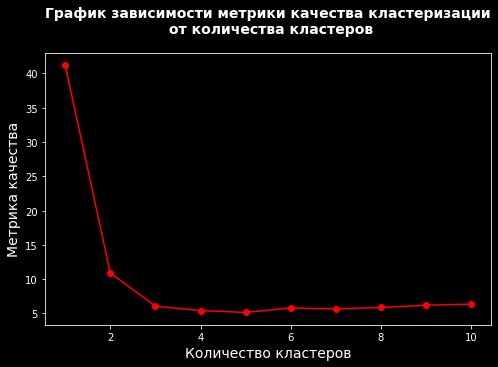

In [182]:
from pylab import rcParams

x = [item[0] for item in cluster_cohesion_list]
y = [item[1] for item in cluster_cohesion_list]

plt.style.use('dark_background')
plt.figure(figsize=(8, 5))
plt.title('График зависимости метрики качества кластеризации\n от количества кластеров', fontdict={'fontsize': 14, 'fontweight': 'bold'}, y=1.05)

plt.plot(x, y, 'o-', c='red')
plt.xlabel('Количество кластеров', fontdict={'fontsize': 14})
plt.ylabel('Метрика качества', fontdict={'fontsize': 14})

plt.show()

**Вывод:** Из графика выше видно, что на маленьком количестве кластеров качество разбиения плохое. При этом постоянное увеличение количества кластеров не является эффективным, так как метрика начинает увеличиваться (в нашем случае она основана на среднем квадратичном внутрикластерном расстоянии). 

На наших данных наилучшее разбиение будет происходить при **k=5** (ошибка составит **5.136**).